In [1]:
import os
os.chdir("../../")


import torch
from pair_classification.bert_finetuning.finetune import set_configs, timer, parse_data_to_bert_format, setup_bert_model, train, validate, predict_for_test
from pair_classification.bert_finetuning.hugginface_pair_clf import BertForSequencePairClassificationDSSM

%load_ext autoreload
%autoreload 2

torch.cuda.is_available()


True

In [2]:
config = set_configs('models/bert_finetuning/config.yml')
device = torch.device(f"cuda:{config['torch_device']}")

In [3]:
with timer('Read data and convert to BERT format'):
    train_loader, val_loader, test_loader, class_names = parse_data_to_bert_format(
        path_to_data=config['path_to_data'],
        train_file_name=config['train_file_name'],
        text_col_name_1=config['text_col_name_1'],
        text_col_name_2=config['text_col_name_2'],
        label_col_name=config['label_col_name'],
        path_to_pretrained_model=config['path_to_pretrained_model'],
        max_seq_length=config['max_seq_length'],
        batch_size=config['batch_size'],
        validate=config['validate'],
        predict_for_test=config['predict_for_test'],
        test_file_name=config['test_file_name'],
        toy=config['toy']
    )

loaded 404290 train records


100%|██████████| 404290/404290 [02:40<00:00, 2525.80it/s]


There are 20 lines longer than 198


100%|██████████| 2345796/2345796 [15:34<00:00, 2510.44it/s]


There are 33 lines longer than 198
[Read data and convert to BERT format] done in 1148 s


In [4]:
with timer('Setting up BERT model'):
    model, optimizer = setup_bert_model(
        path_to_pretrained_model=config['path_to_pretrained_model'],
        num_classes=len(class_names), epochs=config['epochs'],
        lrate=config['lrate'], lrate_clf=config['lrate_clf'],
        batch_size=config['batch_size'],
        accum_steps=config['accum_steps'], lin_dim=config['lin_dim'],
        lin_dropout_prob=config['lin_dropout_prob'],warmup=config['warmup'],
        apex_mixed_precision=config['apex_mixed_precision'],
        seed=config['seed'], device=device, train_loader=train_loader
    )

Building PyTorch model from configuration: {
  "attention_probs_dropout_prob": 0.1,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "type_vocab_size": 2,
  "vocab_size": 30522
}

Converting TensorFlow checkpoint from /home/ubuntu/projects/kaggle/quora_question_pairs_kaggle/models/bert_finetuning/uncased_L-12_H-768_A-12/bert_model.ckpt
Loading TF weight bert/embeddings/LayerNorm/beta with shape [768]
Loading TF weight bert/embeddings/LayerNorm/gamma with shape [768]
Loading TF weight bert/embeddings/position_embeddings with shape [512, 768]
Loading TF weight bert/embeddings/token_type_embeddings with shape [2, 768]
Loading TF weight bert/embeddings/word_embeddings with shape [30522, 768]
Loading TF weight bert/encoder/layer_0/attention/output/LayerNorm/beta with shape [768]
Loading TF weight bert/encoder/layer_0

Loading TF weight bert/encoder/layer_4/output/LayerNorm/beta with shape [768]
Loading TF weight bert/encoder/layer_4/output/LayerNorm/gamma with shape [768]
Loading TF weight bert/encoder/layer_4/output/dense/bias with shape [768]
Loading TF weight bert/encoder/layer_4/output/dense/kernel with shape [3072, 768]
Loading TF weight bert/encoder/layer_5/attention/output/LayerNorm/beta with shape [768]
Loading TF weight bert/encoder/layer_5/attention/output/LayerNorm/gamma with shape [768]
Loading TF weight bert/encoder/layer_5/attention/output/dense/bias with shape [768]
Loading TF weight bert/encoder/layer_5/attention/output/dense/kernel with shape [768, 768]
Loading TF weight bert/encoder/layer_5/attention/self/key/bias with shape [768]
Loading TF weight bert/encoder/layer_5/attention/self/key/kernel with shape [768, 768]
Loading TF weight bert/encoder/layer_5/attention/self/query/bias with shape [768]
Loading TF weight bert/encoder/layer_5/attention/self/query/kernel with shape [768, 76

[Setting up BERT model] done in 12 s


### lr 1e-4/2e-5

In [5]:
model.load_state_dict(torch.load(config['path_to_output_model'] + 'bert_pytorch_freezed.bin'))

<All keys matched successfully>

  0%|          | 0/9576 [00:00<?, ?it/s]

Iter 96/9576. Postfix = loss=0.571
Iter 192/9576. Postfix = loss=0.54
Iter 288/9576. Postfix = loss=0.537
Iter 384/9576. Postfix = loss=0.516
Iter 480/9576. Postfix = loss=0.524
Iter 576/9576. Postfix = loss=0.509
Iter 672/9576. Postfix = loss=0.493
Iter 768/9576. Postfix = loss=0.483
Iter 864/9576. Postfix = loss=0.471
Iter 960/9576. Postfix = loss=0.46
Iter 1056/9576. Postfix = loss=0.481
Iter 1152/9576. Postfix = loss=0.472
Iter 1248/9576. Postfix = loss=0.464
Iter 1344/9576. Postfix = loss=0.441
Iter 1440/9576. Postfix = loss=0.44
Iter 1536/9576. Postfix = loss=0.451
Iter 1632/9576. Postfix = loss=0.444
Iter 1728/9576. Postfix = loss=0.429
Iter 1824/9576. Postfix = loss=0.421
Iter 1920/9576. Postfix = loss=0.413
Iter 2016/9576. Postfix = loss=0.419
Iter 2112/9576. Postfix = loss=0.412
Iter 2208/9576. Postfix = loss=0.405
Iter 2304/9576. Postfix = loss=0.406
Iter 2400/9576. Postfix = loss=0.406
Iter 2496/9576. Postfix = loss=0.411
Iter 2592/9576. Postfix = loss=0.399
Iter 2688/9576.

100%|██████████| 9576/9576 [1:17:16<00:00,  2.07it/s, loss=0.32]

  0%|          | 0/1064 [00:00<?, ?it/s]

Iter 11/1064. Postfix = None
Iter 22/1064. Postfix = None
Iter 33/1064. Postfix = None
Iter 44/1064. Postfix = None
Iter 55/1064. Postfix = None
Iter 66/1064. Postfix = None
Iter 77/1064. Postfix = None
Iter 88/1064. Postfix = None
Iter 99/1064. Postfix = None
Iter 110/1064. Postfix = None
Iter 121/1064. Postfix = None
Iter 132/1064. Postfix = None
Iter 143/1064. Postfix = None
Iter 154/1064. Postfix = None
Iter 165/1064. Postfix = None
Iter 176/1064. Postfix = None
Iter 187/1064. Postfix = None
Iter 198/1064. Postfix = None
Iter 209/1064. Postfix = None
Iter 220/1064. Postfix = None
Iter 231/1064. Postfix = None
Iter 242/1064. Postfix = None
Iter 253/1064. Postfix = None
Iter 264/1064. Postfix = None
Iter 275/1064. Postfix = None
Iter 286/1064. Postfix = None
Iter 297/1064. Postfix = None
Iter 308/1064. Postfix = None
Iter 319/1064. Postfix = None
Iter 330/1064. Postfix = None
Iter 341/1064. Postfix = None
Iter 352/1064. Postfix = None
Iter 363/1064. Postfix = None
Iter 374/1064. Post

100%|██████████| 1/1 [1:20:02<00:00, 4802.15s/it, avg_loss=0.383]

Loss function:  0.30241048187765507
F1-score (micro):  0.8634148754606842
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     25503
           1       0.83      0.79      0.81     14926

    accuracy                           0.86     40429
   macro avg       0.86      0.85      0.85     40429
weighted avg       0.86      0.86      0.86     40429



[Training] done in 4804 s


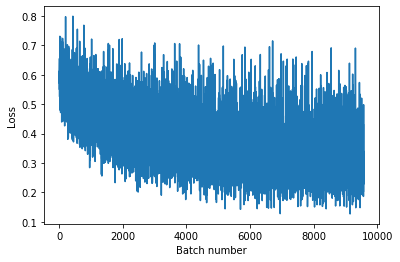

In [6]:
with timer('Training'):
    model = train(
        model=model,
        optimizer=optimizer,
        epochs=1,
        accum_steps=config['accum_steps'],
        apex_mixed_precision=config['apex_mixed_precision'],       
        output_model_file_name=config['output_model_file_name'],
        device=device,
        train_loader=train_loader,
        batch_size=config['batch_size'],
        class_names=class_names,
        val_loader=val_loader,
        bert_freezed=False
    )

In [7]:
torch.save(model.state_dict(), config['path_to_output_model'] + 'bert_pytorch_unfreezed_1.bin')

  0%|          | 0/9576 [00:00<?, ?it/s]

Iter 96/9576. Postfix = loss=0.274
Iter 192/9576. Postfix = loss=0.276
Iter 288/9576. Postfix = loss=0.271
Iter 384/9576. Postfix = loss=0.285
Iter 480/9576. Postfix = loss=0.287
Iter 576/9576. Postfix = loss=0.28
Iter 672/9576. Postfix = loss=0.262
Iter 768/9576. Postfix = loss=0.267
Iter 864/9576. Postfix = loss=0.262
Iter 960/9576. Postfix = loss=0.269
Iter 1056/9576. Postfix = loss=0.29
Iter 1152/9576. Postfix = loss=0.264
Iter 1248/9576. Postfix = loss=0.277
Iter 1344/9576. Postfix = loss=0.279
Iter 1440/9576. Postfix = loss=0.256
Iter 1536/9576. Postfix = loss=0.273
Iter 1632/9576. Postfix = loss=0.287
Iter 1728/9576. Postfix = loss=0.27
Iter 1824/9576. Postfix = loss=0.297
Iter 1920/9576. Postfix = loss=0.279
Iter 2016/9576. Postfix = loss=0.275
Iter 2112/9576. Postfix = loss=0.267
Iter 2208/9576. Postfix = loss=0.276
Iter 2304/9576. Postfix = loss=0.284
Iter 2400/9576. Postfix = loss=0.279
Iter 2496/9576. Postfix = loss=0.254
Iter 2592/9576. Postfix = loss=0.274
Iter 2688/9576.

100%|██████████| 9576/9576 [1:17:15<00:00,  2.07it/s, loss=0.281]

  0%|          | 0/1064 [00:00<?, ?it/s]

Iter 11/1064. Postfix = None
Iter 22/1064. Postfix = None
Iter 33/1064. Postfix = None
Iter 44/1064. Postfix = None
Iter 55/1064. Postfix = None
Iter 66/1064. Postfix = None
Iter 77/1064. Postfix = None
Iter 88/1064. Postfix = None
Iter 99/1064. Postfix = None
Iter 110/1064. Postfix = None
Iter 121/1064. Postfix = None
Iter 132/1064. Postfix = None
Iter 143/1064. Postfix = None
Iter 154/1064. Postfix = None
Iter 165/1064. Postfix = None
Iter 176/1064. Postfix = None
Iter 187/1064. Postfix = None
Iter 198/1064. Postfix = None
Iter 209/1064. Postfix = None
Iter 220/1064. Postfix = None
Iter 231/1064. Postfix = None
Iter 242/1064. Postfix = None
Iter 253/1064. Postfix = None
Iter 264/1064. Postfix = None
Iter 275/1064. Postfix = None
Iter 286/1064. Postfix = None
Iter 297/1064. Postfix = None
Iter 308/1064. Postfix = None
Iter 319/1064. Postfix = None
Iter 330/1064. Postfix = None
Iter 341/1064. Postfix = None
Iter 352/1064. Postfix = None
Iter 363/1064. Postfix = None
Iter 374/1064. Post

100%|██████████| 1/1 [1:20:01<00:00, 4801.07s/it, avg_loss=0.27]


Loss function:  0.2837342893028216
F1-score (micro):  0.8756832966434985
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     25503
           1       0.83      0.83      0.83     14926

    accuracy                           0.88     40429
   macro avg       0.87      0.87      0.87     40429
weighted avg       0.88      0.88      0.88     40429

[Training] done in 4812 s


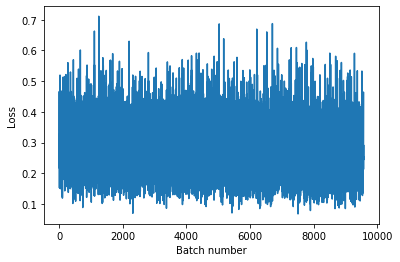

In [8]:
with timer('Training'):
    model = train(
        model=model,
        optimizer=optimizer,
        epochs=1,
        accum_steps=config['accum_steps'],
        apex_mixed_precision=config['apex_mixed_precision'],       
        output_model_file_name=config['output_model_file_name'],
        device=device,
        train_loader=train_loader,
        batch_size=config['batch_size'],
        class_names=class_names,
        val_loader=val_loader,
        bert_freezed=False
    )

In [9]:
torch.save(model.state_dict(), config['path_to_output_model'] + 'bert_pytorch_unfreezed_2.bin')

  0%|          | 0/9576 [00:00<?, ?it/s]

Iter 96/9576. Postfix = loss=0.196
Iter 192/9576. Postfix = loss=0.199
Iter 288/9576. Postfix = loss=0.205
Iter 384/9576. Postfix = loss=0.202
Iter 480/9576. Postfix = loss=0.209
Iter 576/9576. Postfix = loss=0.193
Iter 672/9576. Postfix = loss=0.212
Iter 768/9576. Postfix = loss=0.208
Iter 864/9576. Postfix = loss=0.213
Iter 960/9576. Postfix = loss=0.21
Iter 1056/9576. Postfix = loss=0.238
Iter 1152/9576. Postfix = loss=0.209
Iter 1248/9576. Postfix = loss=0.212
Iter 1344/9576. Postfix = loss=0.195
Iter 1440/9576. Postfix = loss=0.225
Iter 1536/9576. Postfix = loss=0.215
Iter 1632/9576. Postfix = loss=0.217
Iter 1728/9576. Postfix = loss=0.217
Iter 1824/9576. Postfix = loss=0.2
Iter 1920/9576. Postfix = loss=0.203
Iter 2016/9576. Postfix = loss=0.21
Iter 2112/9576. Postfix = loss=0.182
Iter 2208/9576. Postfix = loss=0.206
Iter 2304/9576. Postfix = loss=0.211
Iter 2400/9576. Postfix = loss=0.208
Iter 2496/9576. Postfix = loss=0.199
Iter 2592/9576. Postfix = loss=0.188
Iter 2688/9576. 

100%|██████████| 9576/9576 [1:17:24<00:00,  2.06it/s, loss=0.214]

  0%|          | 0/1064 [00:00<?, ?it/s]

Iter 11/1064. Postfix = None
Iter 22/1064. Postfix = None
Iter 33/1064. Postfix = None
Iter 44/1064. Postfix = None
Iter 55/1064. Postfix = None
Iter 66/1064. Postfix = None
Iter 77/1064. Postfix = None
Iter 88/1064. Postfix = None
Iter 99/1064. Postfix = None
Iter 110/1064. Postfix = None
Iter 121/1064. Postfix = None
Iter 132/1064. Postfix = None
Iter 143/1064. Postfix = None
Iter 154/1064. Postfix = None
Iter 165/1064. Postfix = None
Iter 176/1064. Postfix = None
Iter 187/1064. Postfix = None
Iter 198/1064. Postfix = None
Iter 209/1064. Postfix = None
Iter 220/1064. Postfix = None
Iter 231/1064. Postfix = None
Iter 242/1064. Postfix = None
Iter 253/1064. Postfix = None
Iter 264/1064. Postfix = None
Iter 275/1064. Postfix = None
Iter 286/1064. Postfix = None
Iter 297/1064. Postfix = None
Iter 308/1064. Postfix = None
Iter 319/1064. Postfix = None
Iter 330/1064. Postfix = None
Iter 341/1064. Postfix = None
Iter 352/1064. Postfix = None
Iter 363/1064. Postfix = None
Iter 374/1064. Post

100%|██████████| 1/1 [1:20:09<00:00, 4809.63s/it, avg_loss=0.206]


Loss function:  0.28645869219721876
F1-score (micro):  0.8821885280368053
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     25503
           1       0.82      0.87      0.85     14926

    accuracy                           0.88     40429
   macro avg       0.87      0.88      0.88     40429
weighted avg       0.88      0.88      0.88     40429

[Training] done in 4820 s


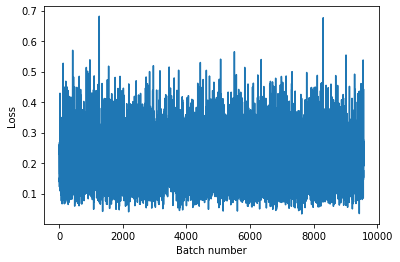

In [10]:
with timer('Training'):
    model = train(
        model=model,
        optimizer=optimizer,
        epochs=1,
        accum_steps=config['accum_steps'],
        apex_mixed_precision=config['apex_mixed_precision'],       
        output_model_file_name=config['output_model_file_name'],
        device=device,
        train_loader=train_loader,
        batch_size=config['batch_size'],
        class_names=class_names,
        val_loader=val_loader,
        bert_freezed=False
    )

In [11]:
torch.save(model.state_dict(), config['path_to_output_model'] + 'bert_pytorch_unfreezed_3.bin')

### lr = 5e-5/8e-6

In [6]:
with timer('Training'):
    model = train(
        model=model,
        optimizer=optimizer,
        epochs=1,
        accum_steps=config['accum_steps'],
        apex_mixed_precision=config['apex_mixed_precision'],       
        output_model_file_name=config['output_model_file_name'],
        device=device,
        train_loader=train_loader,
        batch_size=config['batch_size'],
        class_names=class_names,
        val_loader=val_loader,
        bert_freezed=False
    )

  0%|          | 0/9576 [00:00<?, ?it/s]

Iter 96/9576. Postfix = loss=0.162
Iter 192/9576. Postfix = loss=0.18
Iter 288/9576. Postfix = loss=0.158
Iter 384/9576. Postfix = loss=0.188
Iter 480/9576. Postfix = loss=0.19
Iter 576/9576. Postfix = loss=0.169
Iter 672/9576. Postfix = loss=0.175
Iter 768/9576. Postfix = loss=0.169
Iter 864/9576. Postfix = loss=0.179
Iter 960/9576. Postfix = loss=0.177
Iter 1056/9576. Postfix = loss=0.182
Iter 1152/9576. Postfix = loss=0.216
Iter 1248/9576. Postfix = loss=0.185
Iter 1344/9576. Postfix = loss=0.204
Iter 1440/9576. Postfix = loss=0.2
Iter 1536/9576. Postfix = loss=0.193
Iter 1632/9576. Postfix = loss=0.216
Iter 1728/9576. Postfix = loss=0.174
Iter 1824/9576. Postfix = loss=0.184
Iter 1920/9576. Postfix = loss=0.194
Iter 2016/9576. Postfix = loss=0.194
Iter 2112/9576. Postfix = loss=0.213
Iter 2208/9576. Postfix = loss=0.194
Iter 2304/9576. Postfix = loss=0.18
Iter 2400/9576. Postfix = loss=0.189
Iter 2496/9576. Postfix = loss=0.203
Iter 2592/9576. Postfix = loss=0.186
Iter 2688/9576. P

KeyboardInterrupt: 

In [7]:
torch.save(model.state_dict(), config['path_to_output_model'] + 'bert_pytorch_unfreezed_4.bin')

In [5]:
model.load_state_dict(torch.load(config['path_to_output_model'] + 'bert_pytorch_unfreezed_4.bin'))

<All keys matched successfully>

  0%|          | 0/9576 [00:00<?, ?it/s]

Iter 96/9576. Postfix = loss=0.195
Iter 192/9576. Postfix = loss=0.203
Iter 288/9576. Postfix = loss=0.18
Iter 384/9576. Postfix = loss=0.193
Iter 480/9576. Postfix = loss=0.174
Iter 576/9576. Postfix = loss=0.156
Iter 672/9576. Postfix = loss=0.173
Iter 768/9576. Postfix = loss=0.185
Iter 864/9576. Postfix = loss=0.189
Iter 960/9576. Postfix = loss=0.147
Iter 1056/9576. Postfix = loss=0.163
Iter 1152/9576. Postfix = loss=0.188
Iter 1248/9576. Postfix = loss=0.19
Iter 1344/9576. Postfix = loss=0.179
Iter 1440/9576. Postfix = loss=0.176
Iter 1536/9576. Postfix = loss=0.161
Iter 1632/9576. Postfix = loss=0.164
Iter 1728/9576. Postfix = loss=0.173
Iter 1824/9576. Postfix = loss=0.154
Iter 1920/9576. Postfix = loss=0.184
Iter 2016/9576. Postfix = loss=0.157
Iter 2112/9576. Postfix = loss=0.157
Iter 2208/9576. Postfix = loss=0.173
Iter 2304/9576. Postfix = loss=0.178
Iter 2400/9576. Postfix = loss=0.163
Iter 2496/9576. Postfix = loss=0.159
Iter 2592/9576. Postfix = loss=0.166
Iter 2688/9576

100%|██████████| 9576/9576 [1:17:25<00:00,  2.06it/s, loss=0.143]

  0%|          | 0/1064 [00:00<?, ?it/s]

Iter 11/1064. Postfix = None
Iter 22/1064. Postfix = None
Iter 33/1064. Postfix = None
Iter 44/1064. Postfix = None
Iter 55/1064. Postfix = None
Iter 66/1064. Postfix = None
Iter 77/1064. Postfix = None
Iter 88/1064. Postfix = None
Iter 99/1064. Postfix = None
Iter 110/1064. Postfix = None
Iter 121/1064. Postfix = None
Iter 132/1064. Postfix = None
Iter 143/1064. Postfix = None
Iter 154/1064. Postfix = None
Iter 165/1064. Postfix = None
Iter 176/1064. Postfix = None
Iter 187/1064. Postfix = None
Iter 198/1064. Postfix = None
Iter 209/1064. Postfix = None
Iter 220/1064. Postfix = None
Iter 231/1064. Postfix = None
Iter 242/1064. Postfix = None
Iter 253/1064. Postfix = None
Iter 264/1064. Postfix = None
Iter 275/1064. Postfix = None
Iter 286/1064. Postfix = None
Iter 297/1064. Postfix = None
Iter 308/1064. Postfix = None
Iter 319/1064. Postfix = None
Iter 330/1064. Postfix = None
Iter 341/1064. Postfix = None
Iter 352/1064. Postfix = None
Iter 363/1064. Postfix = None
Iter 374/1064. Post

100%|██████████| 1/1 [1:20:10<00:00, 4810.46s/it, avg_loss=0.167]


Loss function:  0.13223686777220042
F1-score (micro):  0.9495659056617775
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     25503
           1       0.92      0.95      0.93     14926

    accuracy                           0.95     40429
   macro avg       0.94      0.95      0.95     40429
weighted avg       0.95      0.95      0.95     40429

[Training] done in 4812 s


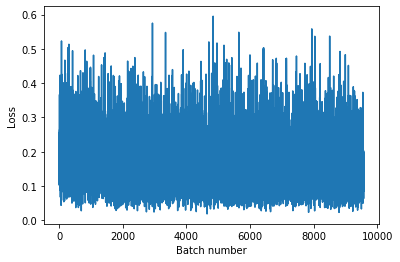

In [6]:
with timer('Training'):
    model = train(
        model=model,
        optimizer=optimizer,
        epochs=1,
        accum_steps=config['accum_steps'],
        apex_mixed_precision=config['apex_mixed_precision'],       
        output_model_file_name=config['output_model_file_name'],
        device=device,
        train_loader=train_loader,
        batch_size=config['batch_size'],
        class_names=class_names,
        val_loader=val_loader,
        bert_freezed=False
    )

In [7]:
torch.save(model.state_dict(), config['path_to_output_model'] + 'bert_pytorch_unfreezed_5.bin')

  0%|          | 0/9576 [00:00<?, ?it/s]

Iter 96/9576. Postfix = loss=0.124
Iter 192/9576. Postfix = loss=0.137
Iter 288/9576. Postfix = loss=0.126
Iter 384/9576. Postfix = loss=0.133
Iter 480/9576. Postfix = loss=0.138
Iter 576/9576. Postfix = loss=0.118
Iter 672/9576. Postfix = loss=0.121
Iter 768/9576. Postfix = loss=0.117
Iter 864/9576. Postfix = loss=0.152
Iter 960/9576. Postfix = loss=0.134
Iter 1056/9576. Postfix = loss=0.13
Iter 1152/9576. Postfix = loss=0.134
Iter 1248/9576. Postfix = loss=0.139
Iter 1344/9576. Postfix = loss=0.121
Iter 1440/9576. Postfix = loss=0.13
Iter 1536/9576. Postfix = loss=0.118
Iter 1632/9576. Postfix = loss=0.12
Iter 1728/9576. Postfix = loss=0.127
Iter 1824/9576. Postfix = loss=0.133
Iter 1920/9576. Postfix = loss=0.129
Iter 2016/9576. Postfix = loss=0.126
Iter 2112/9576. Postfix = loss=0.123
Iter 2208/9576. Postfix = loss=0.128
Iter 2304/9576. Postfix = loss=0.15
Iter 2400/9576. Postfix = loss=0.118
Iter 2496/9576. Postfix = loss=0.15
Iter 2592/9576. Postfix = loss=0.117
Iter 2688/9576. P

100%|██████████| 9576/9576 [1:17:35<00:00,  2.06it/s, loss=0.161]

  0%|          | 0/1064 [00:00<?, ?it/s]

Iter 11/1064. Postfix = None
Iter 22/1064. Postfix = None
Iter 33/1064. Postfix = None
Iter 44/1064. Postfix = None
Iter 55/1064. Postfix = None
Iter 66/1064. Postfix = None
Iter 77/1064. Postfix = None
Iter 88/1064. Postfix = None
Iter 99/1064. Postfix = None
Iter 110/1064. Postfix = None
Iter 121/1064. Postfix = None
Iter 132/1064. Postfix = None
Iter 143/1064. Postfix = None
Iter 154/1064. Postfix = None
Iter 165/1064. Postfix = None
Iter 176/1064. Postfix = None
Iter 187/1064. Postfix = None
Iter 198/1064. Postfix = None
Iter 209/1064. Postfix = None
Iter 220/1064. Postfix = None
Iter 231/1064. Postfix = None
Iter 242/1064. Postfix = None
Iter 253/1064. Postfix = None
Iter 264/1064. Postfix = None
Iter 275/1064. Postfix = None
Iter 286/1064. Postfix = None
Iter 297/1064. Postfix = None
Iter 308/1064. Postfix = None
Iter 319/1064. Postfix = None
Iter 330/1064. Postfix = None
Iter 341/1064. Postfix = None
Iter 352/1064. Postfix = None
Iter 363/1064. Postfix = None
Iter 374/1064. Post

100%|██████████| 1/1 [1:20:20<00:00, 4820.57s/it, avg_loss=0.129]


Loss function:  0.13448755875384194
F1-score (micro):  0.9481560266145589
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     25503
           1       0.91      0.95      0.93     14926

    accuracy                           0.95     40429
   macro avg       0.94      0.95      0.94     40429
weighted avg       0.95      0.95      0.95     40429

[Training] done in 4822 s


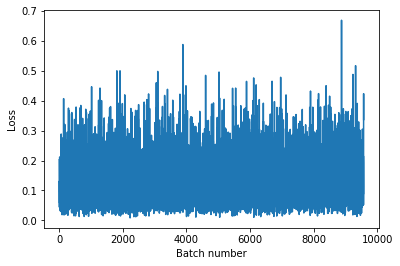

In [8]:
with timer('Training'):
    model = train(
        model=model,
        optimizer=optimizer,
        epochs=1,
        accum_steps=config['accum_steps'],
        apex_mixed_precision=config['apex_mixed_precision'],       
        output_model_file_name=config['output_model_file_name'],
        device=device,
        train_loader=train_loader,
        batch_size=config['batch_size'],
        class_names=class_names,
        val_loader=val_loader,
        bert_freezed=False
    )

In [9]:
torch.save(model.state_dict(), config['path_to_output_model'] + 'bert_pytorch_unfreezed_6.bin')

  0%|          | 0/9576 [00:00<?, ?it/s]

Iter 96/9576. Postfix = loss=0.105
Iter 192/9576. Postfix = loss=0.113
Iter 288/9576. Postfix = loss=0.111
Iter 384/9576. Postfix = loss=0.0983
Iter 480/9576. Postfix = loss=0.112
Iter 576/9576. Postfix = loss=0.104
Iter 672/9576. Postfix = loss=0.126
Iter 768/9576. Postfix = loss=0.105
Iter 864/9576. Postfix = loss=0.101
Iter 960/9576. Postfix = loss=0.119
Iter 1056/9576. Postfix = loss=0.1
Iter 1152/9576. Postfix = loss=0.0999
Iter 1248/9576. Postfix = loss=0.11
Iter 1344/9576. Postfix = loss=0.121
Iter 1440/9576. Postfix = loss=0.123
Iter 1536/9576. Postfix = loss=0.0952
Iter 1632/9576. Postfix = loss=0.0977
Iter 1728/9576. Postfix = loss=0.107
Iter 1824/9576. Postfix = loss=0.11
Iter 1920/9576. Postfix = loss=0.109
Iter 2016/9576. Postfix = loss=0.119
Iter 2112/9576. Postfix = loss=0.106
Iter 2208/9576. Postfix = loss=0.117
Iter 2304/9576. Postfix = loss=0.105
Iter 2400/9576. Postfix = loss=0.11
Iter 2496/9576. Postfix = loss=0.111
Iter 2592/9576. Postfix = loss=0.0974
Iter 2688/95

100%|██████████| 9576/9576 [1:17:28<00:00,  2.06it/s, loss=0.114]

  0%|          | 0/1064 [00:00<?, ?it/s]

Iter 11/1064. Postfix = None
Iter 22/1064. Postfix = None
Iter 33/1064. Postfix = None
Iter 44/1064. Postfix = None
Iter 55/1064. Postfix = None
Iter 66/1064. Postfix = None
Iter 77/1064. Postfix = None
Iter 88/1064. Postfix = None
Iter 99/1064. Postfix = None
Iter 110/1064. Postfix = None
Iter 121/1064. Postfix = None
Iter 132/1064. Postfix = None
Iter 143/1064. Postfix = None
Iter 154/1064. Postfix = None
Iter 165/1064. Postfix = None
Iter 176/1064. Postfix = None
Iter 187/1064. Postfix = None
Iter 198/1064. Postfix = None
Iter 209/1064. Postfix = None
Iter 220/1064. Postfix = None
Iter 231/1064. Postfix = None
Iter 242/1064. Postfix = None
Iter 253/1064. Postfix = None
Iter 264/1064. Postfix = None
Iter 275/1064. Postfix = None
Iter 286/1064. Postfix = None
Iter 297/1064. Postfix = None
Iter 308/1064. Postfix = None
Iter 319/1064. Postfix = None
Iter 330/1064. Postfix = None
Iter 341/1064. Postfix = None
Iter 352/1064. Postfix = None
Iter 363/1064. Postfix = None
Iter 374/1064. Post

100%|██████████| 1/1 [1:20:13<00:00, 4813.66s/it, avg_loss=0.11]


Loss function:  0.1334625710477832
F1-score (micro):  0.9500606000643103
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     25503
           1       0.92      0.94      0.93     14926

    accuracy                           0.95     40429
   macro avg       0.94      0.95      0.95     40429
weighted avg       0.95      0.95      0.95     40429

[Training] done in 4822 s


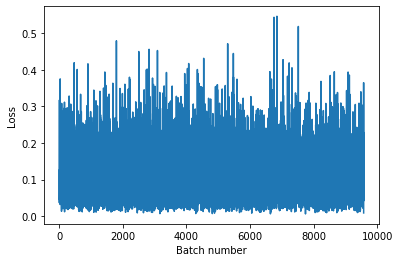

In [10]:
with timer('Training'):
    model = train(
        model=model,
        optimizer=optimizer,
        epochs=1,
        accum_steps=config['accum_steps'],
        apex_mixed_precision=config['apex_mixed_precision'],       
        output_model_file_name=config['output_model_file_name'],
        device=device,
        train_loader=train_loader,
        batch_size=config['batch_size'],
        class_names=class_names,
        val_loader=val_loader,
        bert_freezed=False
    )

In [11]:
torch.save(model.state_dict(), config['path_to_output_model'] + 'bert_pytorch_unfreezed_7.bin')

In [12]:
model.load_state_dict(torch.load(config['path_to_output_model'] + 'bert_pytorch_unfreezed_7.bin'))

<All keys matched successfully>

In [13]:
if config['predict_for_test']:
    with timer('Predicting for test set'):
        predict_for_test(
            torch_loader=test_loader,
            model=model,
            batch_size=config['batch_size'],
            test_pred_file_name=config['test_pred_file_name'],
            class_names=class_names,
            device=device
        )


  0%|          | 0/61732 [00:00<?, ?it/s]

Iter 618/61732. Postfix = None
Iter 1236/61732. Postfix = None
Iter 1854/61732. Postfix = None
Iter 2472/61732. Postfix = None
Iter 3090/61732. Postfix = None
Iter 3708/61732. Postfix = None
Iter 4326/61732. Postfix = None
Iter 4944/61732. Postfix = None
Iter 5562/61732. Postfix = None
Iter 6180/61732. Postfix = None
Iter 6798/61732. Postfix = None
Iter 7416/61732. Postfix = None
Iter 8034/61732. Postfix = None
Iter 8652/61732. Postfix = None
Iter 9270/61732. Postfix = None
Iter 9888/61732. Postfix = None
Iter 10506/61732. Postfix = None
Iter 11124/61732. Postfix = None
Iter 11742/61732. Postfix = None
Iter 12360/61732. Postfix = None
Iter 12978/61732. Postfix = None
Iter 13596/61732. Postfix = None
Iter 14214/61732. Postfix = None
Iter 14832/61732. Postfix = None
Iter 15450/61732. Postfix = None
Iter 16068/61732. Postfix = None
Iter 16686/61732. Postfix = None
Iter 17304/61732. Postfix = None
Iter 17922/61732. Postfix = None
Iter 18540/61732. Postfix = None
Iter 19158/61732. Postfix =

100%|██████████| 61732/61732 [2:39:32<00:00,  6.45it/s]


[Predicting for test set] done in 9580 s
